# Regression: Predict the 5-year return for a mutual fund

## Variables

1. **Fund Type** The type of the fund, labeled DE (Domestic Equity), IE (International Equity) and Fixed Income (FI)

2. **Net Asset Value (USD)** The closing price per share on Dec 2017
3. ** 5-Year Average Return (percentage)** The averga eanuual return for the fund over the five years
4. **Expense Ratior (percentage)** Percentage of assests declared each fiscal year for fund expenses
5. **Morning star rank** The risk adjusted rating for each fund. Morningstar ranks go froma a low of 1-star to a high of 5-star

## Read data 

In [1]:
import pandas as pd

xlsx = pd.ExcelFile('./MutualFunds.xlsx')

xlsx.sheet_names


['Data', 'Sheet2', 'Sheet3']

In [2]:
data = xlsx.parse('Data')

In [3]:
data.head()

,Fund Name,Fund Type,Net Asset Value ($),5 Year Average Return (%),Expense Ratio (%),Morningstar Rank
0,Amer Cent Inc & Growth Inv,DE,28.88,12.39,0.67,2-Star
1,American Century Intl. Disc,IE,14.37,30.53,1.41,3-Star
2,American Century Tax-Free Bond,FI,10.73,3.34,0.49,4-Star
3,American Century Ultra,DE,24.94,10.88,0.99,3-Star
4,Ariel,DE,46.39,11.32,1.03,2-Star


## Data exploration

In [4]:
data.isnull().sum()
## data,dropna()

Fund Name                    0
Fund Type                    0
Net Asset Value ($)          0
5 Year Average Return (%)    0
Expense Ratio (%)            0
Morningstar Rank             0
dtype: int64

In [5]:
data.describe(include='all')

,Fund Name,Fund Type,Net Asset Value ($),5 Year Average Return (%),Expense Ratio (%),Morningstar Rank
count,45,45,45.000000,45.000000,45.000000,45
unique,45,3,NaN,NaN,NaN,4
top,American Century Ultra,DE,NaN,NaN,NaN,3-Star
freq,1,27,NaN,NaN,NaN,18
mean,NaN,NaN,28.008222,15.043111,0.903111,NaN
std,NaN,NaN,15.050313,8.807185,0.357217,NaN
min,NaN,NaN,8.600000,2.370000,0.160000,NaN
25%,NaN,NaN,15.290000,11.320000,0.620000,NaN
50%,NaN,NaN,24.940000,15.310000,1.000000,NaN
75%,NaN,NaN,36.580000,17.250000,1.200000,NaN


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize'] = [12, 12]

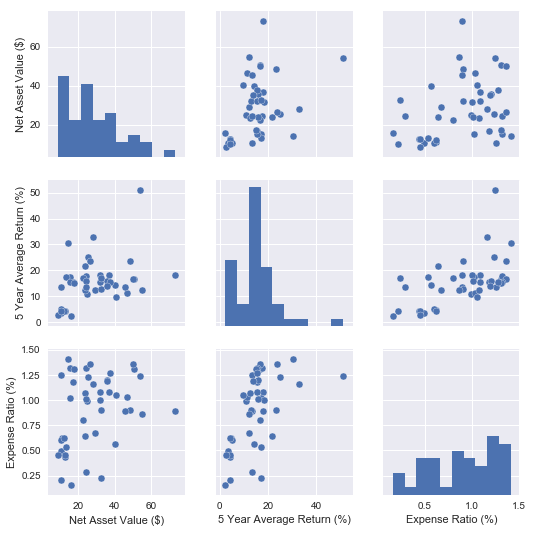

In [7]:
sns.pairplot(data)

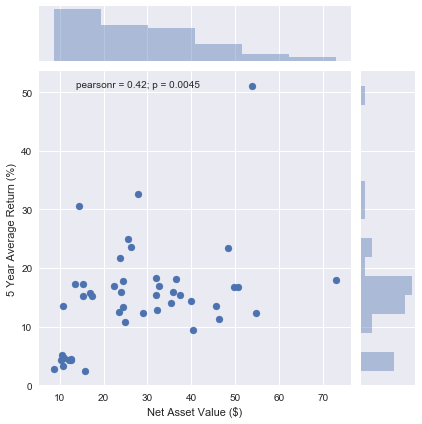

In [8]:
sns.jointplot(data['Net Asset Value ($)'], data['5 Year Average Return (%)'])

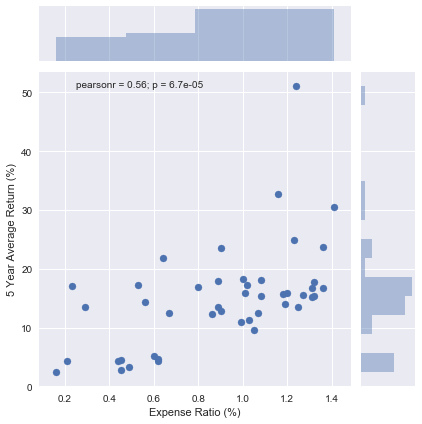

In [9]:
sns.jointplot(data['Expense Ratio (%)'], data['5 Year Average Return (%)'])

## Encoding of categorical variables

In [10]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [11]:
data.columns

Index(['Fund Name', 'Fund Type', 'Net Asset Value ($)',
       '5 Year Average Return (%)', 'Expense Ratio (%)', 'Morningstar Rank'],
      dtype='object')

In [12]:
categorical_features = ['Fund Type', 'Morningstar Rank']

In [13]:
data_tmp = data

In [14]:
for c_feature in categorical_features:
  data = create_dummies( data, c_feature )

In [15]:
data.head()

,Fund Name,Net Asset Value ($),5 Year Average Return (%),Expense Ratio (%),Fund Type_FI,Fund Type_IE,Morningstar Rank_3-Star,Morningstar Rank_4-Star,Morningstar Rank_5-Star
0,Amer Cent Inc & Growth Inv,28.88,12.39,0.67,0,0,0,0,0
1,American Century Intl. Disc,14.37,30.53,1.41,0,1,1,0,0
2,American Century Tax-Free Bond,10.73,3.34,0.49,1,0,0,1,0
3,American Century Ultra,24.94,10.88,0.99,0,0,1,0,0
4,Ariel,46.39,11.32,1.03,0,0,0,0,0


In [16]:
#sns.heatmap(data.corr())
data.corr()

,Net Asset Value ($),5 Year Average Return (%),Expense Ratio (%),Fund Type_FI,Fund Type_IE,Morningstar Rank_3-Star,Morningstar Rank_4-Star,Morningstar Rank_5-Star
Net Asset Value ($),1.000000,0.415647,0.325044,-0.593788,0.189712,-0.409555,0.220770,0.024348
5 Year Average Return (%),0.415647,1.000000,0.558395,-0.622006,0.616594,-0.036075,0.206740,-0.110957
Expense Ratio (%),0.325044,0.558395,1.000000,-0.566128,0.201594,-0.027739,0.137906,-0.134091
Fund Type_FI,-0.593788,-0.622006,-0.566128,1.000000,-0.248548,0.109109,-0.151186,0.170877
Fund Type_IE,0.189712,0.616594,0.201594,-0.248548,1.000000,0.094916,-0.082199,-0.064189
Morningstar Rank_3-Star,-0.409555,-0.036075,-0.027739,0.109109,0.094916,1.000000,-0.577350,-0.379663
Morningstar Rank_4-Star,0.220770,0.206740,0.137906,-0.151186,-0.082199,-0.577350,1.000000,-0.328798
Morningstar Rank_5-Star,0.024348,-0.110957,-0.134091,0.170877,-0.064189,-0.379663,-0.328798,1.000000


# Rename Column Names for regression

In [17]:
data.columns

Index(['Fund Name', 'Net Asset Value ($)', '5 Year Average Return (%)',
       'Expense Ratio (%)', 'Fund Type_FI', 'Fund Type_IE',
       'Morningstar Rank_3-Star', 'Morningstar Rank_4-Star',
       'Morningstar Rank_5-Star'],
      dtype='object')

In [18]:
data.columns = ['Name', 'NAV', 'AverageReturn',
       'ExpenseRatio', 'FundType_FI', 'FundType_IE',
       'Star3', 'Star4',
       'Star5']

In [19]:
data.head()

,Name,NAV,AverageReturn,ExpenseRatio,FundType_FI,FundType_IE,Star3,Star4,Star5
0,Amer Cent Inc & Growth Inv,28.88,12.39,0.67,0,0,0,0,0
1,American Century Intl. Disc,14.37,30.53,1.41,0,1,1,0,0
2,American Century Tax-Free Bond,10.73,3.34,0.49,1,0,0,1,0
3,American Century Ultra,24.94,10.88,0.99,0,0,1,0,0
4,Ariel,46.39,11.32,1.03,0,0,0,0,0


## Split for test and train

In [20]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)

## Perform Regression

In [21]:
import statsmodels.formula.api as smf

model = smf.ols(formula='AverageReturn ~ NAV + ExpenseRatio +  FundType_FI + FundType_IE  + Star3 + Star4 + Star5', data=data).fit() 

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          AverageReturn   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     14.09
Date:                Mon, 31 Jul 2017   Prob (F-statistic):           9.57e-09
Time:                        16:41:02   Log-Likelihood:                -132.02
No. Observations:                  45   AIC:                             280.0
Df Residuals:                      37   BIC:                             294.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        1.2704      4.520      0.281      0.780        -7.889    10.430
NAV              0.0555      0.071      0.783      0.438        -0.088     0.199
ExpenseRatio     5.4909      2.600      2.112      0.041         0.223    10.758
FundType_FI     -7.1560      2.629     -2.722      0.010       -12.482    -1.830
FundType_IE     11.1677      2.060      5.421      0.000         6.994    15.341
Star3            6.8611      3.081      2.227      0.032         0.618    13.105
Star4            8.6350      2.907      2.971      0.005         2.745    14.525
Star5            6.9853      3.192      2.188      0.035         0.517    13.453
==============================================================================
Omnibus:                       32.473   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.202
Skew:                           1.707   Prob(JB):                     1.17e-24
Kurtosis:                       9.864   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predict Values and plot residual

In [75]:
data['predicted'] = model.predict(data)

In [80]:
data['residual'] = data['AverageReturn'] -data['predicted'] 

In [77]:
data.residual

0     -5.838266
1     -2.691274
2      2.695336
3      4.071352
4     -1.820006
5      2.519006
6     -0.120354
7      1.490189
8     -0.274738
9      2.627012
10    -2.669341
11     0.732850
12    -5.440877
13     1.549551
14    -2.715654
15    -0.790938
16    -0.141413
17     5.239813
18     2.048560
19     1.163625
20     0.791413
21     0.357471
22     3.436776
23     2.855723
24     2.053312
25     7.892473
26     0.918492
27    -0.159851
28     1.256454
29    -5.485526
30     2.276707
31    -0.234201
32    -5.138225
33    -4.849318
34   -20.228109
35    -1.365632
36    10.270550
37     3.501249
38     0.741277
39    -0.557257
40     2.483068
41    -1.421855
42     0.354084
43    -5.807855
44     4.424348
Name: residual, dtype: float64

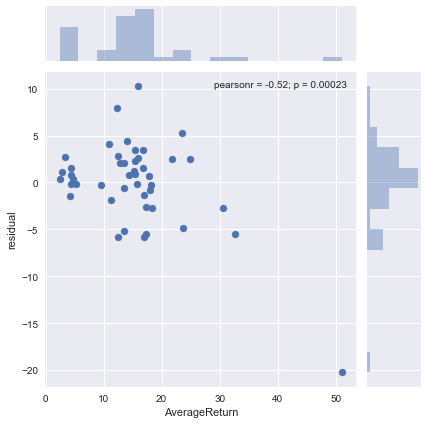

In [79]:
sns.jointplot(data['AverageReturn'], data['residual'])

## Compute MAPE

In [81]:
data['mape'] = data['residual'] / data['AverageReturn']

In [82]:
data['mape'] = data['mape'] * 100.00

In [84]:
data['mape'] = data['mape'].abs()

In [85]:
mape = data['mape'].sum()

In [86]:
mape

945.7689232151308

## The End